# Lab 6


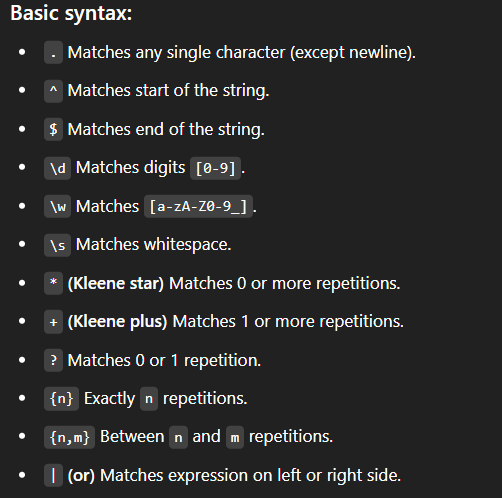


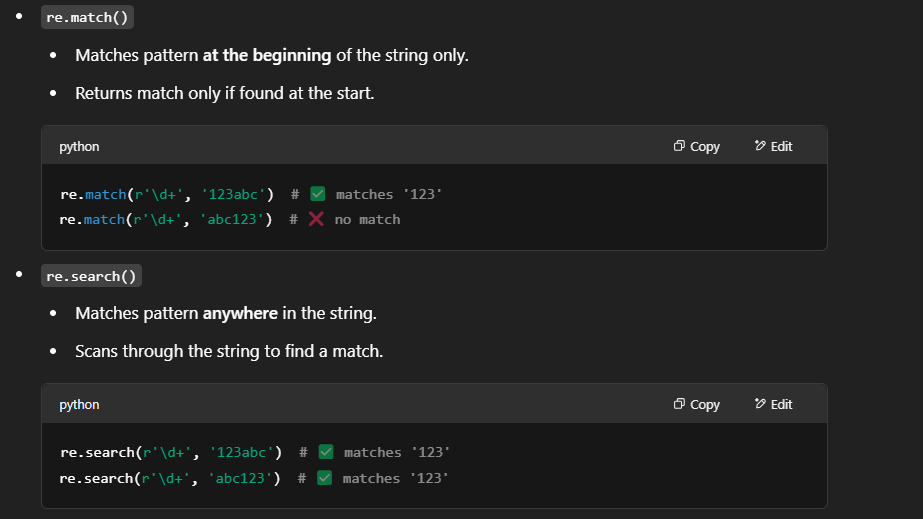

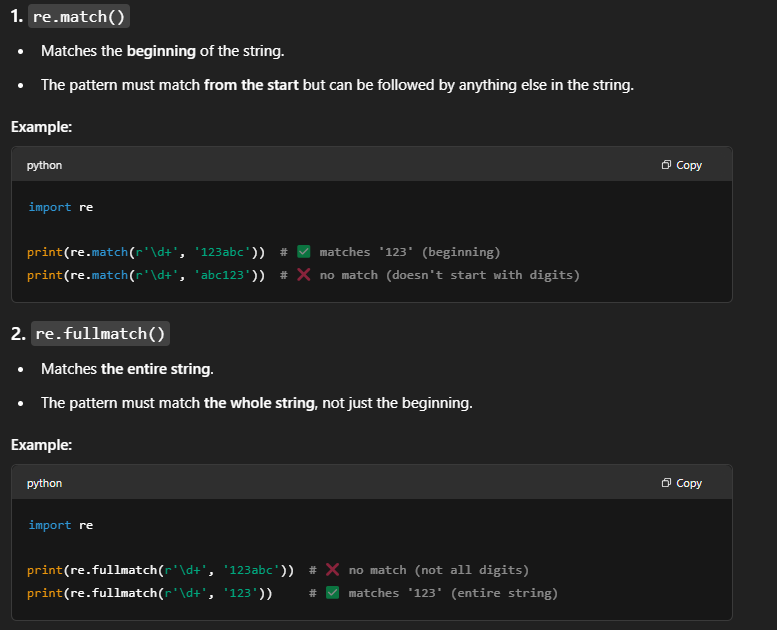

- check the strength of the password
- find and display variable names from the text file (using RE)
- extract reg-no from student's email address
- detect spam messages using regular expressions and assign a score

In [16]:
# password conditions:
# - at least 8 characters
# - at least 1 lowercase letter
# - at least 1 uppercase letter
# - at least 1 number
# - at least 1 special character

import re
strength: int = 0
password: str = input("Enter your password: ")

if re.search(r'.{8,}', password):
    strength += 1
    print("Password has 8 characters.")
if re.search(r'[a-z]', password):
    strength += 1
    print("password has lowercase letters")
if re.search(r'[A-Z]', password):
    strength += 1
    print("password has uppercase characters")
if re.search(r'[0-9]', password):
    strength += 1
    print("password has numbers")
if re.search(r'[@#$]', password):
    strength += 1
    print("password has special characters")

print(f"The strength of the password is: {strength}")


Password has 8 characters.
password has lowercase letters
password has uppercase characters
password has numbers
password has special characters
The strength of the password is: 5


In [49]:
# read the v_names.txt file and display the valid variable names

potential_variables: list = []
with open('v_names.txt', 'r') as f:
    for line in f:
        potential_variables.extend(line.split())

print(potential_variables)

print(f"==========================================")


for potential in potential_variables:
    if re.fullmatch( r'[a-zA-Z_]+[a-zA-Z_\d]*' ,potential):
        print(f"{potential} is a valid variable name")

['x', 'xyz', 'ref', 'y', '___kelvin', '123abcd', '_james', 'abcd', '5', '6', '7', 'Killer123', 'Registration', 'ONE']
x is a valid variable name
xyz is a valid variable name
ref is a valid variable name
y is a valid variable name
___kelvin is a valid variable name
_james is a valid variable name
abcd is a valid variable name
Killer123 is a valid variable name
Registration is a valid variable name
ONE is a valid variable name


In [61]:
# email address pattern: reg-no@gmail.com
# eg: 22ntucs1167@gmail.com
# 22ntucs1167 is the full reg no and 1167 is the exact

emails = []

with open('reg_no.txt', 'r') as f:
    for line in f:
        emails.append(line.strip())

print(emails)

full_reg_no = []
exact_reg_no = []

for email in emails:
    full_reg_no.append(re.match(r'[^@]+', email).group())
    exact_reg_no.append(re.search(r'\d{4}', email).group())


print(f"==========================================")
print(full_reg_no)
print(f"==========================================")
print(exact_reg_no)

['22ntucs1167@gmail.com', '22ntucs1168@gmail.com', '22ntucs1169@gmail.com', '22ntucs1135@gmail.com', '22ntucs1138@gmail.com', '22ntucs1160@gmail.com', '22ntucs1159@gmail.com', '22ntucs1175@gmail.com', '23ntucs1245@gmail.com', '21ntucs1355@gmail.com', '23ntucs1354@gmail.com', '21ntucs1265@gmail.com']
['22ntucs1167', '22ntucs1168', '22ntucs1169', '22ntucs1135', '22ntucs1138', '22ntucs1160', '22ntucs1159', '22ntucs1175', '23ntucs1245', '21ntucs1355', '23ntucs1354', '21ntucs1265']
['1167', '1168', '1169', '1135', '1138', '1160', '1159', '1175', '1245', '1355', '1354', '1265']


In [74]:
# spam male detection using regular expressions.
# criteria for spam mail:
# - contains the word 'free'
# - contains the word 'cash'
# - contains the word 'win'
# - contains the word 'prize'
# - contains the word 'money'
# - all alphabets are capitalized
# - contains $ sign
# - contains the word 'congratulations'
# - has excessive use of exclamation marks


messages = []
with open('spam.txt', 'r') as f:
    for line in f:
        messages.append(line.strip())


spam_ranking: dict[str: int] = {}

for message in messages:
    spam_ranking[message] = 0
    if re.search(r'free', message, re.IGNORECASE):
        print("the free word is in the message")
        spam_ranking[message] += 1
    if re.search(r'cash', message, re.IGNORECASE):
        spam_ranking[message] += 1
    if re.search(r'win', message, re.IGNORECASE):
        spam_ranking[message] += 1
    if re.search(r'prize', message, re.IGNORECASE):
        spam_ranking[message] += 1
    if re.search(r'money', message, re.IGNORECASE):
        spam_ranking[message] += 1
    if re.search(r'congratulations', message, re.IGNORECASE):
        spam_ranking[message] += 1
    if re.search(r'[$]', message):
        spam_ranking[message] += 1
    if re.search(r'^[^a-z]+$', message):
        spam_ranking[message] += 1
        print("not even one small alphabet")
    if len(re.findall(r'!', message)) >= 2:
        spam_ranking[message] += 1
        print("has 2 or more exclamation marks")

print(spam_ranking)

the free word is in the message
not even one small alphabet
the free word is in the message
has 2 or more exclamation marks
has 2 or more exclamation marks
the free word is in the message
has 2 or more exclamation marks
the free word is in the message
has 2 or more exclamation marks
has 2 or more exclamation marks
the free word is in the message
has 2 or more exclamation marks
the free word is in the message
not even one small alphabet
has 2 or more exclamation marks
{'THIS MESSAGE IS FOR SURE A SPAM, FREE CASH WIN PRIZE MONEY': 6, 'Win a free iPhone! Click here to claim your prize!': 4, 'Earn $1000 a day from home, no experience required!': 1, "Congratulations! You've won a lottery worth $1,000,000!": 3, 'Limited time offer! Free vacation for 2 to Bahamas, sign up now!': 2, 'Exclusive deal just for you! Buy one get one free, limited time!': 2, 'You have been selected for a special reward! Redeem now.': 0, 'Get paid instantly by sharing your link with friends!': 0, 'Your account has be